# Prb Statement - Predicting the class of the species using Iris data .

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('Iris.csv') 
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
df.shape

(150, 6)

In [22]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

# Encoding the categorical data to numerical data

In [23]:
from sklearn import preprocessing
def preprocessor(x):
    le = preprocessing.LabelEncoder()
    x = le.fit_transform(x)
    return x

In [24]:
df = df.apply(lambda x : preprocessor(x))

In [25]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,8,14,4,1,0
1,1,6,9,4,1,0
2,2,4,11,3,1,0
3,3,3,10,5,1,0
4,4,7,15,4,1,0


C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

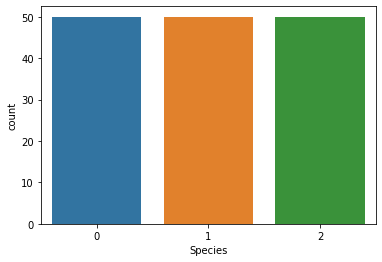

In [26]:
sns.countplot(df['Species'])

In [27]:
df.dtypes

Id               int64
SepalLengthCm    int64
SepalWidthCm     int64
PetalLengthCm    int64
PetalWidthCm     int64
Species          int32
dtype: object

# Seperating X and Y

In [28]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 4].values 

# Modelling

In [29]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20) 

# Scaling the data 

In [30]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
from sklearn.neighbors import KNeighborsClassifier 

classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

# Model Evaluation ( Multiclass)

In [32]:
Y_predicted = classifier.predict(X_test)

In [33]:
Y_prob = classifier.predict_proba(X_test)

In [34]:
from sklearn import metrics
print("Accuracy of testing data--->",metrics.accuracy_score(Y_test, Y_predicted))
print("Precision--->",metrics.precision_score(Y_test, Y_predicted ,average = "macro"))
print("Recall--->",metrics.recall_score(Y_test, Y_predicted ,average = "macro"))
print("f1_score--->",metrics.f1_score(Y_test, Y_predicted ,average = "macro"))

Accuracy of testing data---> 0.36666666666666664
Precision---> 0.13858585858585856
Recall---> 0.2611111111111111
f1_score---> 0.17702589807852967


C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Area Under the Curve for MultiClass Classification

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score , auc
roc_auc_score(Y_test, Y_prob, multi_class='ovo', average='weighted')

ValueError: Number of classes in y_true not equal to the number of columns in 'y_score'

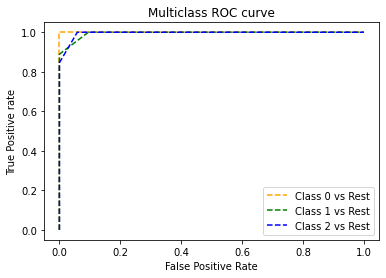

In [18]:
fpr = {}
tpr = {}
thresh ={}

n_class = 3
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);   

# Confusion metrics

In [18]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_predicted))  

[[0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


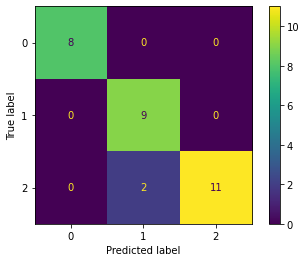

In [20]:
metrics.plot_confusion_matrix(classifier,X_test,Y_test)

# Classification Report

In [21]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.82      1.00      0.90         9
           2       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.94      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30



# Detection of Optimal Value for K Neighnours

In [22]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

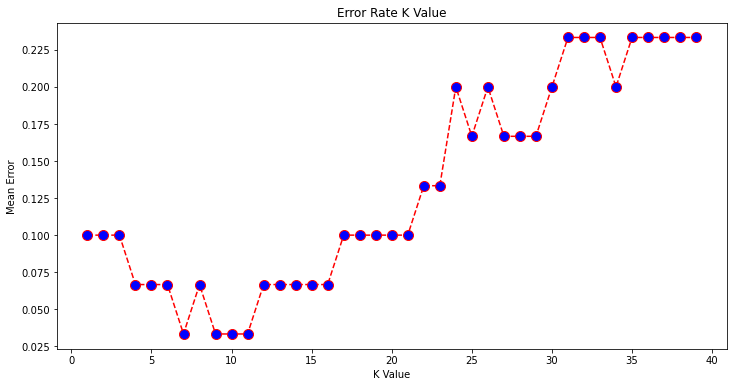

In [23]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()